# Project: Time Series - Forecasting the number of Air Passengers

----
## Context: 
-------

This dataset provides monthly totals of a US airline passengers (in thousands) from the period of 1949 to 1960. This dataset is taken from an inbuilt dataset of R called AirPassengers.

---------
## Objective:
------------
You are a data scientist for this airline and they want to forecast the monthly number of passengers for the next 24 months (i.e for the period of 1961-1962) to balance their manpower hiring and decision on the additional/alteration in the existing and new routes. This forecast will also help the airline to set their dynamic pricing according to the need.

--------
## Attributes Information:
------------
- 'Year-Month' ----> Month and Year starting from 01-01-1949
- '# Passengers' ----> Total number of passengers for a particular month

---------------------------


### Import libraries

In [22]:

!pip install statsmodels --upgrade

zsh:1: command not found: pip


In [23]:

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#Importing library for date manipulation
from datetime import datetime

### Reading the dataset

In [26]:
#Reading the dataset
df = pd.read_excel('AirPassenger.xlsx')
df.head()

,Year-Month,# Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [27]:
#Check the shape of the dataset
df.shape

(144, 2)

In [28]:
#Setting the date as an index to make the dataset with only one column

df['Year-Month'] = pd.to_datetime(df['Year-Month'], infer_datetime_format=True)
df = df.set_index(['Year-Month'])
df.head()

,# Passengers
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


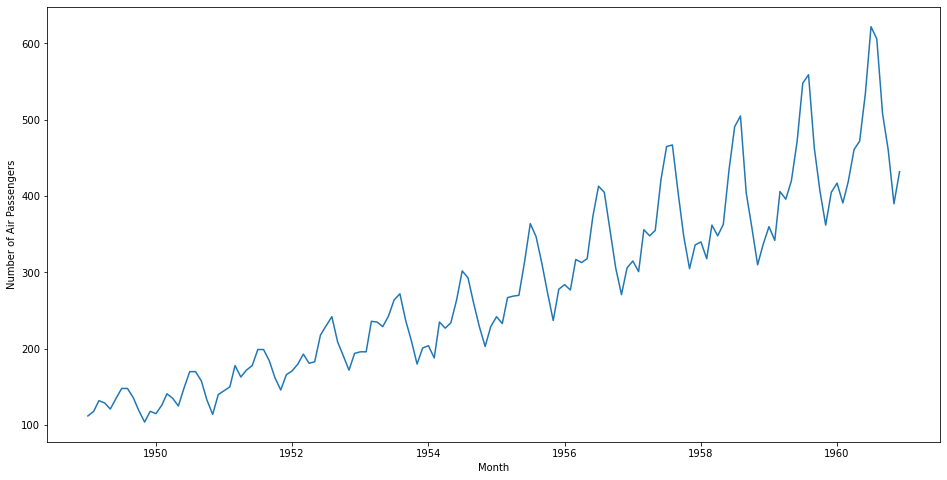

In [29]:
# Visualizing the time series dataset
plt.figure(figsize=(16,8))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)

**Observations**
- We can see that the series has a upward trend with some seasonality
- Before modelling with AR, MA or ARMA, we need to check whether the series is stationary or not
- Let us first check the rolling mean and standard deviation of the series if we can visualize any trend or seaonality

In [30]:
# Calculating the rolling mean and standard deviation for a window of 12 observations

rolmean=df.rolling(window=12).mean()    #calculate the mean here
rolstd=df.rolling(window=12).std()     #calculate the standard deviation here

print(rolmean.head(13))
print('**************************************')
print('**************************************')
print(rolstd.head(13))

            # Passengers
Year-Month              
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
**************************************
**************************************
            # Passengers
Year-Month              
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01     13.720147
1950-01-01     13.453342


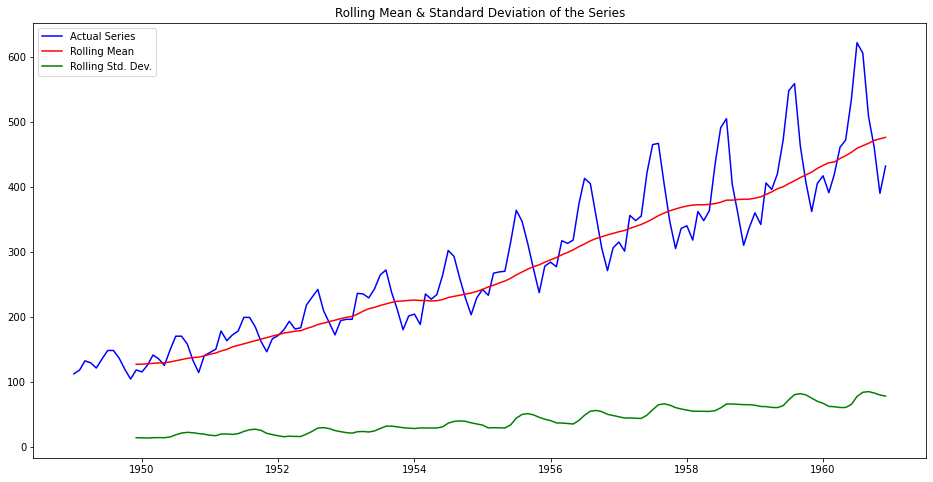

In [31]:
#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(df, color='blue', label='Actual Series')     #fill the dataframe name
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean')    #fill the dataframe name 
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')   #fill the dataframe name
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()



In [32]:
#Define a function to use adfuller test
def adfuller(df):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(df['# Passengers'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(df)


Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


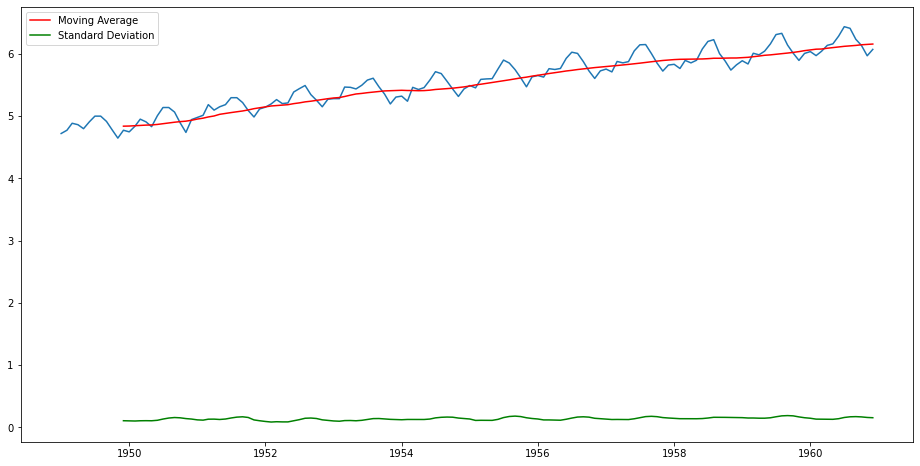

In [33]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
df_log = np.log(df)
MAvg = df_log.rolling(window=12).mean()   #calculate the mean
MStd = df_log.rolling(window=12).std()   #calculate the standard deviation
plt.plot(df_log)                            #plot the dataframe with log transformation
plt.plot(MAvg, color='r', label = 'Moving Average')   #plot the moving average of the dataframe with log transformation
plt.plot(MStd, color='g', label = 'Standard Deviation')   #plot the standard deviation of the dataframe with log transformation
plt.legend()
plt.show()

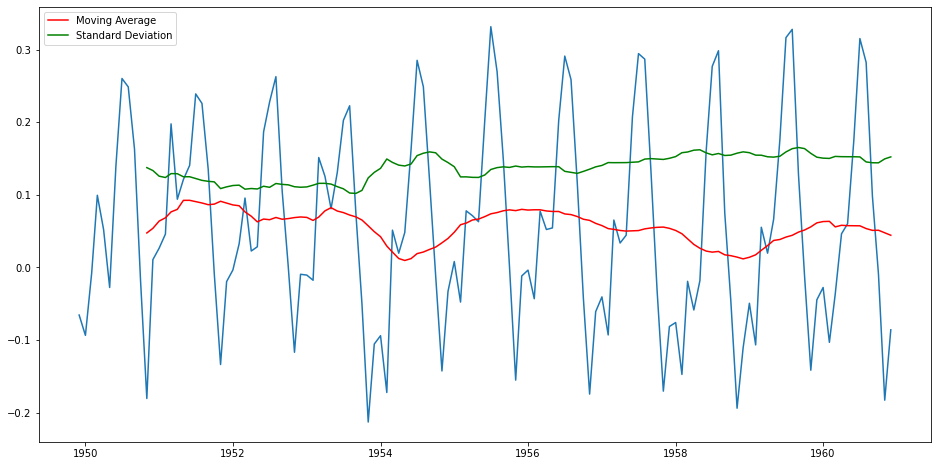

In [34]:
# Visualize the rolling mean and standard deviation after using log transform and differencing 
plt.figure(figsize=(16,8))
df_log_diff = df_log - MAvg
MAvg_diff = df_log_diff.rolling(window=12).mean()    #calculate the mean
MStd_diff = df_log_diff.rolling(window=12).std()    #calculate the standard deviation
plt.plot(df_log_diff)                                     #plot the dataframe with differencing
plt.plot(MAvg_diff, color='r', label = 'Moving Average')  #plot the moving average of the dataframe with differencing
plt.plot(MStd_diff, color='g', label = 'Standard Deviation') #plot the standard deviation of the dataframe with differencing
plt.legend()
plt.show()

#Dropping the null values that we get after applying diffrencing method
df_log_diff = df_log_diff.dropna()


In [35]:
#Using the adfuller function for df_log_diff
adfuller(df_log_diff)


Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Observations     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


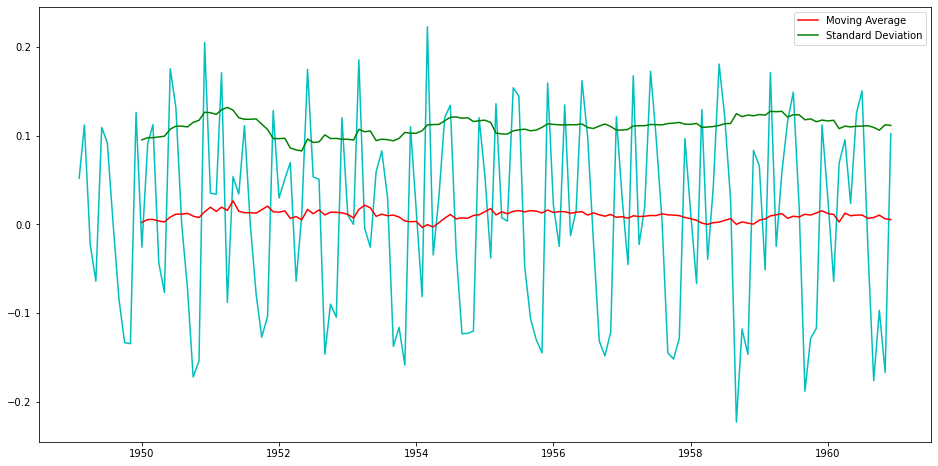

In [36]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 1)
MAvg_shift = df_shift.rolling(window=12).mean()   #calculate the mean
MStd_shift = df_shift.rolling(window=12).std()   #calculate the standard deviation
plt.plot(df_shift, color='c')                       #plot the dataframe with lag
plt.plot(MAvg_shift, color='red', label = 'Moving Average')    #plot the moving average of the dataframe with lag
plt.plot(MStd_shift, color='green', label = 'Standard Deviation')    #plot the standard deviation of the dataframe with lag
plt.legend()
plt.show()

#Dropping the null values that we get after applying diffrencing method
df_shift = df_shift.dropna()

In [37]:
#Using the adfuller function for df_shift
adfuller(df_shift)

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Observations     128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


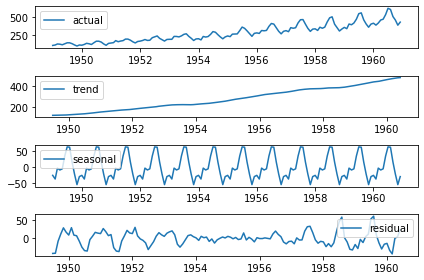

In [38]:
#Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df)      #Use the actual series to decompose

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(df, label='actual')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend()
plt.tight_layout()

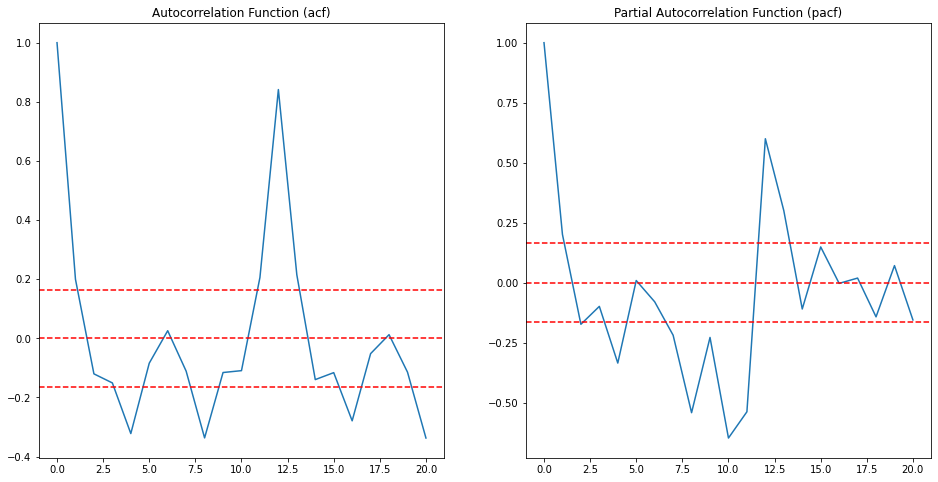

In [39]:
#Importing acf and pacf functions
from statsmodels.tsa.stattools import acf, pacf
#Using 20 lags in the series
lag_acf = acf(df_shift, nlags=20)
lag_pacf = pacf(df_shift, nlags=20, method='ols')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.title('Autocorrelation Function (acf)')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_shift)),linestyle='--',color='red')
plt.title('Partial Autocorrelation Function (pacf)')
plt.show()

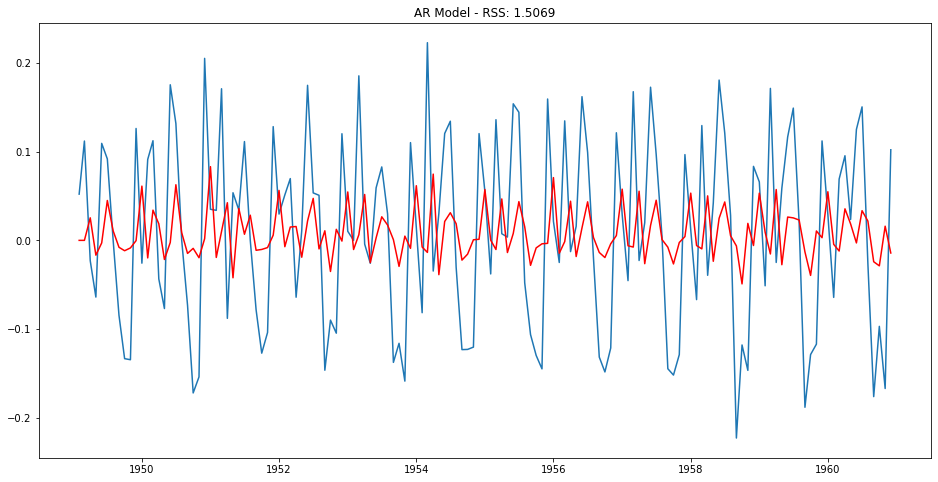

In [40]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

#Comparing the actual & predicted series by AR model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
model_AR = AutoReg(df_shift, lags=2) #Using number of lags as 2
results_AR =model_AR.fit()
plt.plot(df_shift)   #Visualizing the actual series used for modelling

predict = results_AR.predict(start=0,end=len(df_shift)-1)
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RSS: %.4f'% sum((predict-df_shift['# Passengers'])**2))   #calculate the residual sum of squares
plt.show()


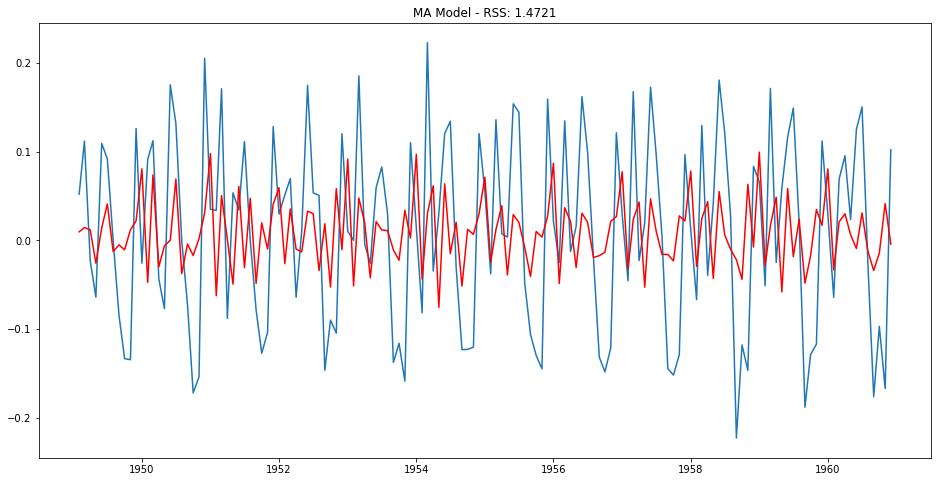

In [41]:
#Importing ARMA
from statsmodels.tsa.arima_model import ARMA

#Comparing the actual & predicted series by MA model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
model_MA = ARMA(df_shift, order=(0,2)) #Using p=0 and q=2
results_MA = model_MA.fit()
plt.plot(df_shift)              #Visualzing the actual series used for modelling
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model - RSS: %.4f'% sum((results_MA.fittedvalues-df_shift['# Passengers'])**2))    #calculate the residual sum of squares
plt.show()


### ARMA Model 

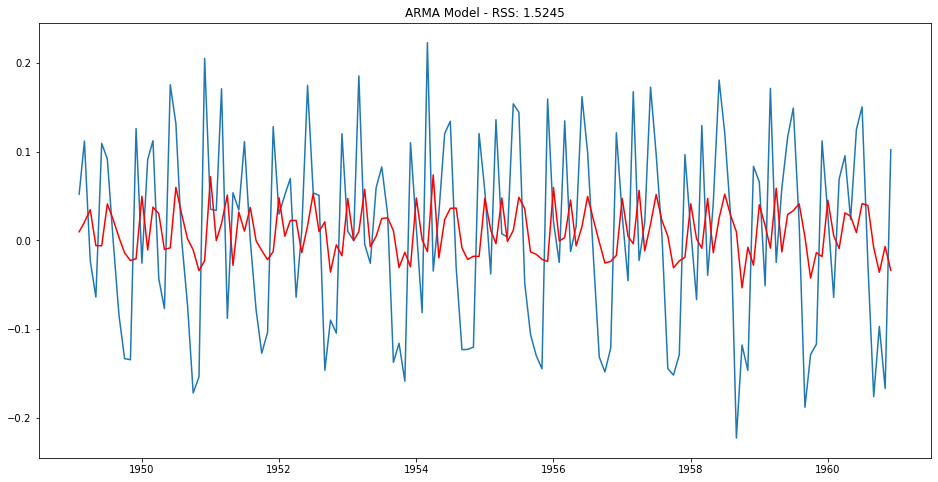

In [42]:
from statsmodels.tsa.arima_model import ARMA

#Comparing the actual & predicted series by AR model and calculating the Residual Sum of Squares
plt.figure(figsize=(16,8))
model = ARMA(df_shift, order=(0,1)) #Using p=2, q=2
results = model.fit()
plt.plot(df_shift)            #Visualizing the actual series used for modelling
plt.plot(results.fittedvalues, color='red')
plt.title('ARMA Model - RSS: %.4f'% sum((results.fittedvalues-df_shift['# Passengers'])**2))   #calculate the residual sum of squares
plt.show()  



In [43]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           # Passengers   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 121.754
Method:                       css-mle   S.D. of innovations              0.103
Date:                Fri, 27 Nov 2020   AIC                           -237.507
Time:                        19:03:26   BIC                           -228.619
Sample:                    02-01-1949   HQIC                          -233.895
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0097      0.011      0.887      0.375      -0.012       0.031
ma.L1.# Passengers     0.2722      0.095      2.873      0.004       0.086       0.458
                    

In [44]:
#Printing the fitted values
predictions=pd.Series(results.fittedvalues)
predictions

Year-Month
1949-02-01    0.009726
1949-03-01    0.020485
1949-04-01    0.034537
1949-05-01   -0.005924
1949-06-01   -0.006085
                ...   
1960-08-01    0.039451
1960-09-01   -0.008103
1960-10-01   -0.036076
1960-11-01   -0.006877
1960-12-01   -0.033920
Length: 143, dtype: float64

**Observations:**
- We can see that by using ARMA model, we get RSS = 1.5245 i.e lesser than both AR and MA models
- Since ARMA model gives us the best RSS, we will forecast the values using ARMA

### Inverse Transformation 

In [45]:
#First step - doing cumulative sum
predictions_cumsum = predictions.cumsum()    #Use the predicted values series
predictions_cumsum

Year-Month
1949-02-01    0.009726
1949-03-01    0.030211
1949-04-01    0.064748
1949-05-01    0.058824
1949-06-01    0.052739
                ...   
1960-08-01    1.437194
1960-09-01    1.429091
1960-10-01    1.393015
1960-11-01    1.386138
1960-12-01    1.352218
Length: 143, dtype: float64

In [46]:
#Second step - Adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(df_log['# Passengers'].iloc[0], index=df_log.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)   #Use the series with cumulative sum
predictions_log

Year-Month
1949-01-01    4.718499
1949-02-01    4.728225
1949-03-01    4.748710
1949-04-01    4.783247
1949-05-01    4.777323
                ...   
1960-08-01    6.155693
1960-09-01    6.147590
1960-10-01    6.111514
1960-11-01    6.104637
1960-12-01    6.070717
Length: 144, dtype: float64

In [47]:
#Third step - applying exponential transformation
predictions_ARMA = np.exp(predictions_log)       #Use the series with log values
predictions_ARMA

Year-Month
1949-01-01    112.000000
1949-02-01    113.094633
1949-03-01    115.435225
1949-04-01    119.491677
1949-05-01    118.785907
                 ...    
1960-08-01    471.393286
1960-09-01    467.589066
1960-10-01    451.021147
1960-11-01    447.930017
1960-12-01    432.991129
Length: 144, dtype: float64

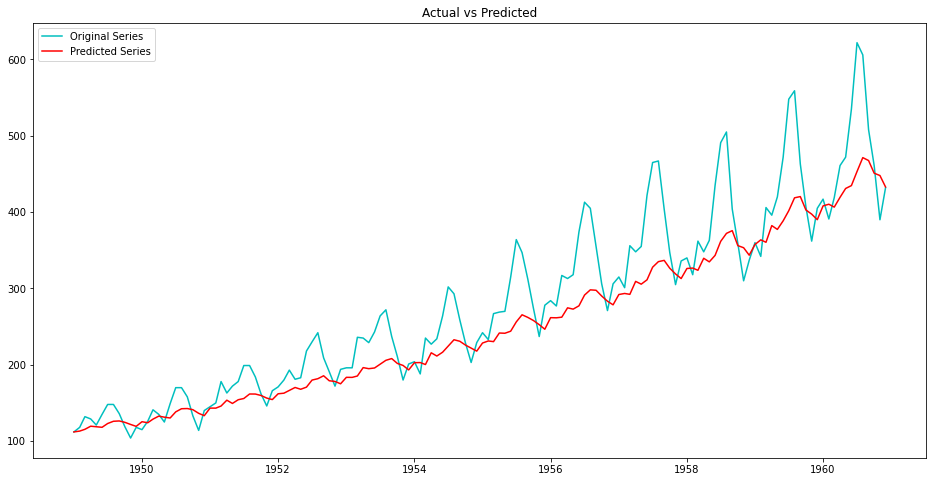

In [48]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(df, color = 'c', label = 'Original Series')
plt.plot(predictions_ARMA, color = 'r', label = 'Predicted Series')       #Use the series with predicted values
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

**Observations**
- We can see that the predicted series is very similar to that of original series
- Let us forecast the number of passengers for next 24 months

### Forecasting the number of passengers for next 24 months (4 marks)

In order to forecast the values for next 24 months, we need to follow the below steps-
1. Forecast the fitted values for next 24 months
2. Make a combined list containing the previous fitted values by ARMA model (1949-1960 and these 24 months (1961-1962) forecasted values
3. Convert that combined list into a series so that we can work with pandas functions 
4. Make a dataframe where we have the dates starting from 01-01-1949 to 12-01-1962 as the index and the respective predicted cumulative sum values
5. Add the log values of the original series in the same dataframe from 1949-1960 and 1961-1962 as NaN (since we don't know the original number of passengers for this period)
6. Applying the inverse tranformation and get the forecasted number of passengers

In [49]:
#Forecasting the values for next 24 months
predictions_ARMA = results.forecast(steps=24) # here steps represent the number of months
predictions_ARMA[0]

array([0.04679252, 0.00972605, 0.00972605, 0.00972605, 0.00972605,
       0.00972605, 0.00972605, 0.00972605, 0.00972605, 0.00972605,
       0.00972605, 0.00972605, 0.00972605, 0.00972605, 0.00972605,
       0.00972605, 0.00972605, 0.00972605, 0.00972605, 0.00972605,
       0.00972605, 0.00972605, 0.00972605, 0.00972605])

In [50]:
#Converting the fitted values by ARMA into a list
predictions_list = predictions.tolist()
#Converting the forecasted values by ARMA into a list
predictions_ARMA_list = predictions_ARMA[0].tolist()
#combining the both lists
predictions_list.extend(predictions_ARMA_list)
predictions_list

[0.00972605459834873,
 0.02048462473645539,
 0.03453717383293543,
 -0.005923949843743372,
 -0.006084856084214607,
 0.04117812786696651,
 0.023540219008604035,
 0.003319581902877844,
 -0.014189670829658496,
 -0.022752805961028716,
 -0.020749255006098366,
 0.04974381521764082,
 -0.010820273470207642,
 0.03753164366183037,
 0.030122707857582545,
 -0.010306320328626245,
 -0.008414033799124865,
 0.05981435437833868,
 0.029331142159205376,
 0.0017435815623658563,
 -0.010670774421075446,
 -0.03424663199449203,
 -0.02290584304597354,
 0.07187147836541248,
 -0.0002836689345438112,
 0.019029565531168163,
 0.05112517025189939,
 -0.028145949345454058,
 0.032012486958736694,
 0.010345627829098133,
 0.03726101612577011,
 -0.0004145343668830598,
 -0.011489278658056157,
 -0.021802572668482817,
 -0.012641183343599982,
 0.04810530011733873,
 0.004710455777561094,
 0.022403578409915623,
 0.022606853027330884,
 -0.013896576286825724,
 0.0164986995601491,
 0.05286462293225289,
 0.00992190011891135,
 0.0208

In [51]:
#Converting the combined list into a series
predictions_list_series = pd.Series(predictions_list)
predictions_list_series

0      0.009726
1      0.020485
2      0.034537
3     -0.005924
4     -0.006085
         ...   
162    0.009726
163    0.009726
164    0.009726
165    0.009726
166    0.009726
Length: 167, dtype: float64

In [52]:
forecasted_cumsum = predictions_list_series.cumsum()
forecasted_cumsum

0      0.009726
1      0.030211
2      0.064748
3      0.058824
4      0.052739
         ...   
162    1.583806
163    1.593532
164    1.603258
165    1.612984
166    1.622710
Length: 167, dtype: float64

In [53]:
#Making a new dataframe to get the additional dates from 1961-1962
index = pd.date_range('1949-02-01','1963-01-01' , freq='1M') - pd.offsets.MonthBegin(1)
df_final = pd.DataFrame()
df_final['Forecasted cumsum'] = forecasted_cumsum
df_final.index = index
df_final 

,Forecasted cumsum
1949-02-01,0.009726
1949-03-01,0.030211
1949-04-01,0.064748
1949-05-01,0.058824
1949-06-01,0.052739
...,...
1962-08-01,1.583806
1962-09-01,1.593532
1962-10-01,1.603258
1962-11-01,1.612984


In [54]:
#Joining the forecasted cum sum values to that with original log series
df_final = df_final.join(df_log, lsuffix='cumsum')
df_final
#The last NaN values show the absence of the original values

,Forecasted cumsum,# Passengers
1949-02-01,0.009726,4.770685
1949-03-01,0.030211,4.882802
1949-04-01,0.064748,4.859812
1949-05-01,0.058824,4.795791
1949-06-01,0.052739,4.905275
...,...,...
1962-08-01,1.583806,NaN
1962-09-01,1.593532,NaN
1962-10-01,1.603258,NaN
1962-11-01,1.612984,NaN


In [55]:
#Adding the first value to the cum sum values
forecasted_log = pd.Series(df_final['# Passengers'].iloc[0], index = df_final.index)
forecasted_log = forecasted_log.add(df_final['Forecasted cumsum'])
forecasted_log 

1949-02-01    4.780411
1949-03-01    4.800895
1949-04-01    4.835432
1949-05-01    4.829509
1949-06-01    4.823424
                ...   
1962-08-01    6.354491
1962-09-01    6.364217
1962-10-01    6.373943
1962-11-01    6.383669
1962-12-01    6.393395
Freq: M, Length: 167, dtype: float64

In [56]:
#Applying exponential transformation to the forecasted log values
forecasted_ARMA = np.exp(df_final['Forecasted cumsum'])
forecasted_ARMA

1949-02-01    1.009774
1949-03-01    1.030672
1949-04-01    1.066890
1949-05-01    1.060588
1949-06-01    1.054155
                ...   
1962-08-01    4.873469
1962-09-01    4.921100
1962-10-01    4.969196
1962-11-01    5.017762
1962-12-01    5.066804
Freq: M, Name: Forecasted cumsum, Length: 167, dtype: float64

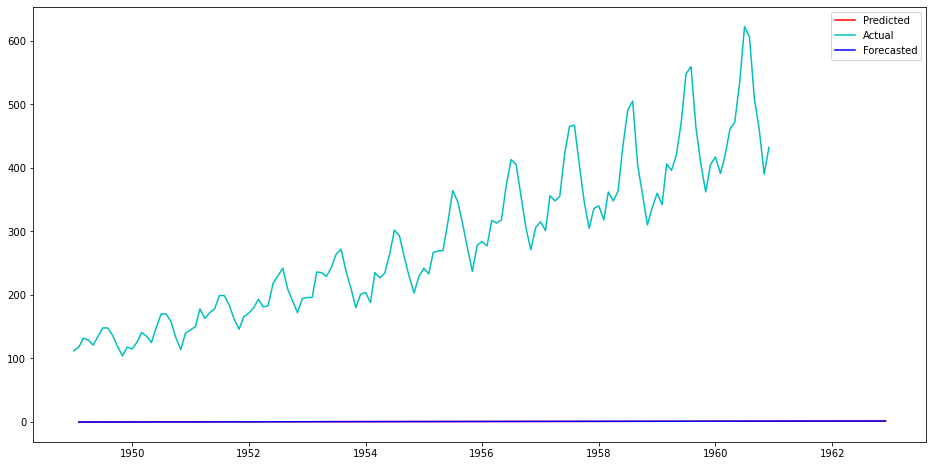

In [60]:
#Visualizing the forecasted values
plt.figure(figsize=(16,8))
plt.plot(df_final['Forecasted cumsum'], label = 'Predicted', color = 'r')   #use the forecasted values till 1960-12-01
plt.plot(df['# Passengers'], label = 'Actual', color = 'c')
plt.plot(df_final['Forecasted cumsum'], color = 'b', label = 'Forecasted')   #use the forecasted values from 1961-01-01 to 1962-12-01
plt.legend()
plt.show()

**Observations:**

*********************End*********************